1.  Análisis de metadatos dicom y visualización
1.1. Extraer y analizar los metadatos DICOM

In [74]:
import pydicom
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
dcm_data_prueba = pydicom.dcmread(r'C:\Users\Isabela\Documents\2025-1\Imagenes\DatosEntrega1\Patient11\201\1.3.46.670589.11.45555.5.0.8800.2023062816190336887.dcm')
dcm_data_prueba

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 170
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.46.670589.11.45555.5.0.8800.2023062816190336887
(0002,0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.773
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 192'
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY', 'M_SE', 'M', 'SE']
(0008,0016) SOP Class UID                       UI: MR Image Storage
(0008,0018) SOP Instance UID                    UI: 1.3.46.670589.11.45555.5.0.8800.2023062816190336887
(0008,0020) Study Date                          DA: '20230628'
(0008,0021) Series Date                         DA: '2

In [ ]:
dcm_data_prueba. dir()

['AccessionNumber',
 'AcquisitionDate',
 'AcquisitionMatrix',
 'AcquisitionNumber',
 'AcquisitionTime',
 'AdmissionID',
 'AngioFlag',
 'BitsAllocated',
 'BitsStored',
 'BodyPartExamined',
 'BurnedInAnnotation',
 'CardiacNumberOfImages',
 'Columns',
 'ContentDate',
 'ContentTime',
 'DateOfLastCalibration',
 'DeviceSerialNumber',
 'DiffusionBValue',
 'EchoNumbers',
 'EchoTime',
 'EchoTrainLength',
 'FlipAngle',
 'FrameOfReferenceUID',
 'GantryID',
 'HeartRate',
 'HighBit',
 'ImageComments',
 'ImageOrientationPatient',
 'ImagePositionPatient',
 'ImageType',
 'ImagedNucleus',
 'ImagingFrequency',
 'InPlanePhaseEncodingDirection',
 'InstanceNumber',
 'InstitutionAddress',
 'InstitutionName',
 'InstitutionalDepartmentName',
 'IntervalsAcquired',
 'IntervalsRejected',
 'InversionTime',
 'LossyImageCompression',
 'MRAcquisitionType',
 'MagneticFieldStrength',
 'Manufacturer',
 'ManufacturerModelName',
 'Modality',
 'NumberOfAverages',
 'NumberOfPhaseEncodingSteps',
 'NumberOfTemporalPositions'

In [56]:
nombre_paciente = dcm_data_prueba.PatientName
print("Patient name: "+ str(nombre_paciente))
modality= dcm_data_prueba.Modality
print("Modality: "+ str(modality))
SliceThickness= dcm_data_prueba.SliceThickness
print("Slice Thickness: "+ str(SliceThickness))
BodyPartExamined= dcm_data_prueba.BodyPartExamined
print("Body Part Examined: "+ str(BodyPartExamined))
MRAcquisitionType= dcm_data_prueba.MRAcquisitionType
print("MR Acquisition Type: "+ str(MRAcquisitionType))
PhotometricInterpretation= dcm_data_prueba.PhotometricInterpretation
print("Photometric Interpretation: "+ str(PhotometricInterpretation))
RepetitionTime= dcm_data_prueba.RepetitionTime
print("Repetition Time (TR): "+ str(RepetitionTime))
EchoTime= dcm_data_prueba.EchoTime
print("EchoTime (ET): "+ str(EchoTime))
SpacingBetweenSlices= dcm_data_prueba.SpacingBetweenSlices
print("SpacingBetweenSlices: "+ str( SpacingBetweenSlices))
Manufacturer= dcm_data_prueba.Manufacturer
print("Manufacturer: "+ str( Manufacturer))
MagneticFieldStrength = dcm_data_prueba.MagneticFieldStrength 
print("Magnetic Field Strength : "+ str( MagneticFieldStrength ))
#ScannerModel = dcm_data_prueba.ScannerModel 
#print("Scanner Model : "+ str( ScannerModel ))

Patient name: TEST
Modality: MR
Slice Thickness: 4
Body Part Examined: LSPINE
MR Acquisition Type: 
Photometric Interpretation: MONOCHROME2
Repetition Time (TR): -1
EchoTime (ET): -1
SpacingBetweenSlices: 5
Manufacturer: Philips
Magnetic Field Strength : None


In [62]:
dcm_data_prueba. dir('Scanner') #No existe el atributo
#dcm_data_prueba.ScannerModel    

[]

In [68]:
print("Name:" + str(dcm_data_prueba['PatientName'].name))
print("Tag:" + str(dcm_data_prueba['PatientName'].tag))
print("Type:" + str(dcm_data_prueba['PatientName'].VR))
print("Value:" + str(dcm_data_prueba['PatientName'].value))

Name:Patient's Name
Tag:(0010,0010)
Type:PN
Value:TEST


In [71]:
lista=["PatientName","Modality","SliceThickness","BodyPartExamined","MRAcquisitionType",
       "PhotometricInterpretation","RepetitionTime","EchoTime","SpacingBetweenSlices","Manufacturer",
       "MagneticFieldStrength"]

nombre=[]
num_tag=[]
tipo=[]
valor=[]
for i in lista:
    nombre.append(str(dcm_data_prueba[i].name))
    num_tag.append(str(dcm_data_prueba[i].tag))
    tipo.append(str(dcm_data_prueba[i].VR))
    valor.append(str(dcm_data_prueba[i].value))
    


In [75]:
data={"Name":nombre,"Tag":num_tag,"Type":tipo,"Value":valor}
DataF=pd.DataFrame(data)
DataF

,Name,Tag,Type,Value
0,Patient's Name,"(0010,0010)",PN,TEST
1,Modality,"(0008,0060)",CS,MR
2,Slice Thickness,"(0018,0050)",DS,4
3,Body Part Examined,"(0018,0015)",CS,LSPINE
4,MR Acquisition Type,"(0018,0023)",CS,
5,Photometric Interpretation,"(0028,0004)",CS,MONOCHROME2
6,Repetition Time,"(0018,0080)",DS,-1
7,Echo Time,"(0018,0081)",DS,-1
8,Spacing Between Slices,"(0018,0088)",DS,5
9,Manufacturer,"(0008,0070)",LO,Philips


In [10]:
dcm_data_prueba.pixel_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(480, 480), dtype=uint16)

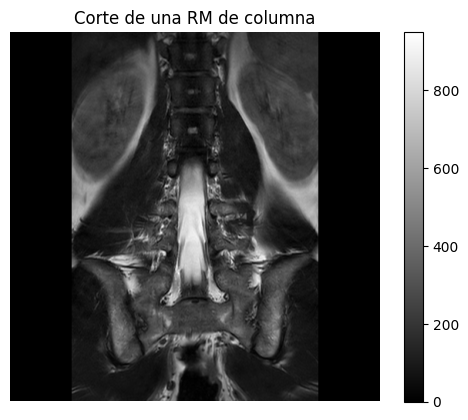

In [60]:
im = dcm_data_prueba.pixel_array
plt.imshow(im, cmap= 'gray' )
plt.axis( 'off' )
plt.title( 'Corte de una RM de columna' )
plt.colorbar()
plt.show()

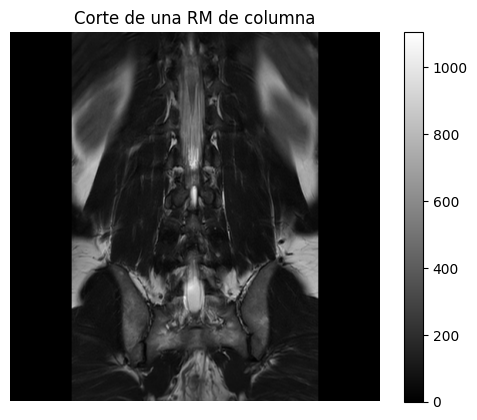

In [61]:
dcm_data_prueba1 = pydicom.dcmread(r'C:\Users\Isabela\Documents\2025-1\Imagenes\DatosEntrega1\Patient11\201\1.3.46.670589.11.45555.5.0.8800.2023062816190337890.dcm')
im = dcm_data_prueba1.pixel_array
plt.imshow(im, cmap= 'gray' )
plt.axis( 'off' )
plt.title( 'Corte de una RM de columna' )
plt.colorbar()
plt.show()

In [57]:
nombre_paciente = dcm_data_prueba1.PatientName
print("Patient name: "+ str(nombre_paciente))
modality= dcm_data_prueba1.Modality
print("Modality: "+ str(modality))
SliceThickness= dcm_data_prueba1.SliceThickness
print("Slice Thickness: "+ str(SliceThickness))
BodyPartExamined= dcm_data_prueba1.BodyPartExamined
print("Body Part Examined: "+ str(BodyPartExamined))
MRAcquisitionType= dcm_data_prueba1.MRAcquisitionType
print("MR Acquisition Type: "+ str(MRAcquisitionType))
PhotometricInterpretation= dcm_data_prueba1.PhotometricInterpretation
print("Photometric Interpretation: "+ str(PhotometricInterpretation))
RepetitionTime= dcm_data_prueba1.RepetitionTime
print("Repetition Time (TR): "+ str(RepetitionTime))
EchoTime= dcm_data_prueba1.EchoTime
print("EchoTime (ET): "+ str(EchoTime))
SpacingBetweenSlices= dcm_data_prueba1.SpacingBetweenSlices
print("SpacingBetweenSlices: "+ str( SpacingBetweenSlices))
Manufacturer= dcm_data_prueba1.Manufacturer
print("Manufacturer: "+ str( Manufacturer))
MagneticFieldStrength = dcm_data_prueba1.MagneticFieldStrength 
print("Magnetic Field Strength : "+ str( MagneticFieldStrength ))

Patient name: TEST
Modality: MR
Slice Thickness: 4
Body Part Examined: LSPINE
MR Acquisition Type: 
Photometric Interpretation: MONOCHROME2
Repetition Time (TR): -1
EchoTime (ET): -1
SpacingBetweenSlices: 5
Manufacturer: Philips
Magnetic Field Strength : None
